# Matplotlib 유형별 그래프

## #01. 작업 준비

패키지 설치

In [28]:
from matplotlib import pyplot as plt
from pandas import read_excel
import numpy as np

글꼴과 음수를 그래프에 적용하기 위한 전역 설정

In [29]:
# 폰트 설정
plt.rcParams['font.family'] =  "Malgun Gothic"  # 윈도우 전용

# 글자 크기
plt.rcParams['font.size'] = 12

# 그래프 크기 설정(inch)
plt.rcParams["figure.figsize"] = (6,3)

# 유니코드에서 음수 부호 설정
plt.rcParams['axes.unicode_minus'] = False

## #02. Bar Chart - plt.bar

막대그래프는 범주형 데이터

x축은 범주형 데이터 (카테고리)를 의미

첫 번째 파라미터 : 카테고리

두 번째 파라미터 : 데이터

### 1. 세로 막대 그래프

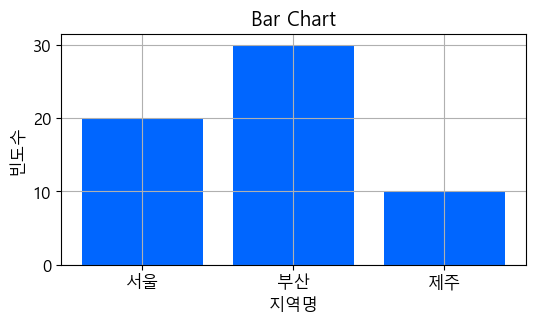

In [30]:
x = ["서울", "부산", "제주"]
y = [20, 30, 10]

plt.figure()    # 그래프 시작
plt.title("Bar Chart")  # 그래프 제목
plt.xlabel("지역명")    # x축 제목
plt.ylabel("빈도수")    # y축 제목
# 각 막대의 색상은 단색으로 통일
plt.bar(x,y, color = "#0066ff")
plt.grid()  # 그리드(바탕 줄) 표시
plt.show()  # 그래프를 화면에 표시
plt.close() # 그래프 종료

### 2. 가로 막대 그래프

가로 막대 그래프인 경우 barh(ydata, xdata) 메서드 사용

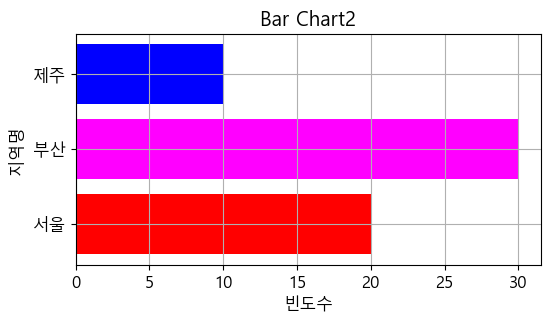

In [31]:
y = ["서울", "부산", "제주"]
x = [20, 30, 10]

plt.figure()    # 그래프 시작
plt.title("Bar Chart2") # 그래프 제목
# 각 막대의 색상을 다르게 지정
plt.barh(y,x, color = ['red', 'magenta', 'blue'])

plt.ylabel("지역명")    # y축 제목
plt.xlabel("빈도수")    # x축 제목
plt.grid()  # 그리드(바탕 줄) 표시
plt.show()  # 그래프를 화면에 표시
plt.close() # 그래프 종료

### 3. 다중 막대 그래프

예제 데이터 가져오기

In [32]:
df = read_excel("https://data.hossam.kr/grade.xlsx")
df

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,77,88,64
1,영희,2,여자,88,90,62,72
2,민철,1,남자,92,70,83,79
3,수현,3,여자,63,60,31,70
4,호영,4,남자,75,50,90,88


x축에 표시할 텍스트 설정

In [33]:
xlabels = list(df['이름'])
xlabels

['철수', '영희', '민철', '수현', '호영']

x축 좌표

- 다중 막대 그래프의 경우 x축을 좌표값(숫자)를 원소로 갖는 numpy.array로 처리하는 것이 유리

- 반복문을 돌려야하는 list와는 다르게 일괄 처리가 가능하기 때문

In [34]:
x = np.array(range(0, len(xlabels)))
x

array([0, 1, 2, 3, 4])

y축 데이터

In [35]:
y1 = list(df['국어'])
y1

[98, 88, 92, 63, 75]

In [36]:
y2 = list(df['영어'])
y2

[77, 90, 70, 60, 50]

그래프 그리기1

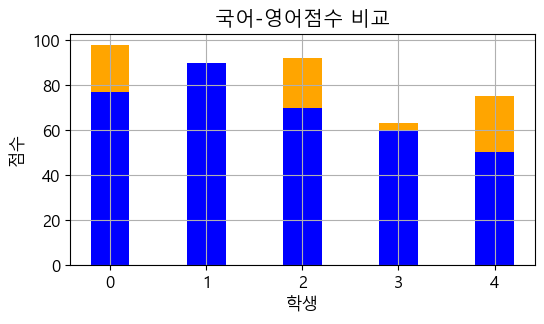

In [37]:
plt.figure()    # 그래프 생성 시작
plt.title("국어-영어점수 비교") # 그래프 제목

# 각 막대의 색상을 지정
plt.bar(x,y1, color = 'orange', label = '국어', width = 0.4)
plt.bar(x,y2, color = 'blue', label = '국어', width = 0.4)

plt.xlabel('학생')  # x축 제목
plt.ylabel('점수')  # x축 제목
plt.grid()  # 그리드 생성
plt.show()
plt.close()

x축 변수 변경

- plt.xticks를 설정해 변수 변경

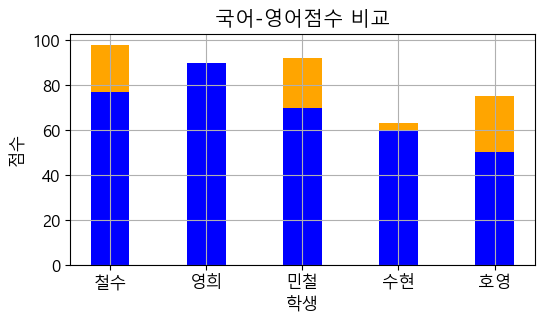

In [42]:
plt.figure()    # 그래프 생성 시작
plt.title("국어-영어점수 비교") # 그래프 제목

# 각 막대의 색상을 지정
plt.bar(x,y1, color = 'orange', label = '국어', width = 0.4)
plt.bar(x,y2, color = 'blue', label = '국어', width = 0.4)

plt.xlabel('학생')  # x축 제목
plt.ylabel('점수')  # x축 제목
plt.grid()  # 그리드 생성
plt.xticks(x, xlabels)  # x축 변수 변경
plt.show()
plt.close()

그래프가 겹치지 않게 x 거리 분리, 범례 표시

- plt.bar에서 두께는 반드시 짝수로 줘야 막대의 위치를 변경 했을 때 겹치지 않음

- width와 x축 이동 범위를 유의

- plt.legend()로 범례 표시

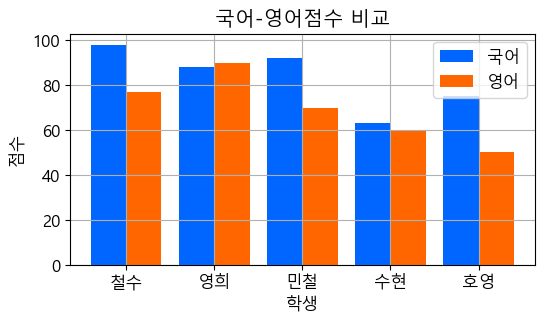

In [48]:
plt.figure()
plt.title("국어-영어점수 비교")

# 각 막대의 색상을 단색으로 지정
# 막대의 x축을 이동해 막대를 분리
# 
plt.bar(x-0.2, y1, color='#0066ff', label="국어", width=0.4)
plt.bar(x+0.2, y2, color='#ff6600', label="영어", width=0.4)

plt.xlabel("학생")
plt.ylabel("점수")
plt.grid()  # 그리드 생성
plt.legend()    # 범례 표시(위치 자동-수동 가능)
plt.xticks(x, xlabels)  # x축 변수 변경

plt.show()
plt.close()

## #03. Pie Chart - plt.pie()

카테고리 별 값의 상대적인 비교

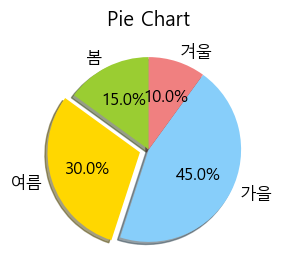

In [40]:
# 데이터
data = [15, 30, 45, 10]
# 각 데이터별 레이블
labels = ['봄', '여름', '가을', '겨울']
# 데이터별 색상
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
# 각 데이터별 확대 비율
explode = (0, 0.1, 0, 0)

plt.figure()
plt.title("Pie Chart")
plt.pie(data,
        labels=labels, colors=colors,
        explode=explode, autopct="%0.1f%%",
        startangle=90, shadow=True)
# autopct로 표시되는 숫자를 설정 가능
plt.show()
plt.close()

## #04. Scatter Plot (산점도) - scatter

(단순 선형 회귀 : 1차 함수)

두 집단이 상관 관계가 있는 경우 사용

실무에서는 반드시 정확한 수치 값(숫자)를 제시

2차원 데이터 즉, 두 개의 실수 데이터 집합의 상관관계를 살펴보려면 scatter 명령으로 스캐터 플롯을 그린다

스캐터 플롯의 점 하나의 위치는 데이터 하나의 x, y 값

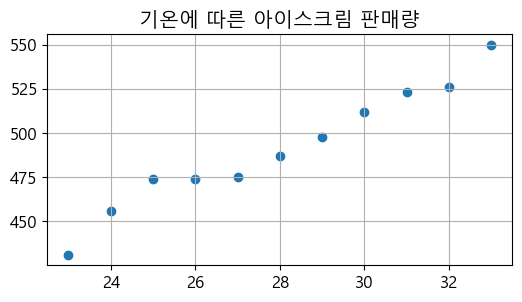

In [41]:
기온 =   [23,  24,  25,  26,  27,  28,  29,  30,  31,  32, 33]
판매량 = [431, 456, 474, 474, 475, 487, 498, 512, 523, 526, 550]

plt.figure()    # 그래프 시작
plt.title("기온에 따른 아이스크림 판매량")  # 그래프 제목
plt.scatter(기온, 판매량)   
plt.grid()  # 그리드 표시
plt.show()  # 화면에 그래프 표시
plt.close() # 그래프 종료